<a href="https://www.bigdatauniversity.com"><img align = center src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 400> </a>

# <center> Exercise: Convolution on Images using TensorFlow for Deep Neural Networks (DNN)</center>

This exercise is about learning to apply convolutions on an image using Tensorflow. Idea is to create a weight matrix and apply the function conv2d with 'same' and 'Valid' padding to check the effects on output image. 

To give an overview of how the output changes based on convolution parameters, this exercise is designed to build Layer one of Convolution Neural Network (CNN) along with maxpooling and relu functions and Visualize the outputs given an input image. 

### First, let's import the TensorFlow library and Python dependencies

In [1]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf

### Read and display image by coverting it to a gray scale.   

Read the input image as float data type as Tensorflow accepts images in float format. 

First download a samole image:

In [2]:
!wget --output-document /Users/zhanggan/mydata/tensorflow/resources/data/lena.png https://ibm.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png

--2017-11-07 22:37:25--  https://ibm.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png
Resolving ibm.box.com... 107.152.25.197
Connecting to ibm.box.com|107.152.25.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png [following]
--2017-11-07 22:37:29--  https://ibm.ent.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png
Resolving ibm.ent.box.com... 107.152.25.211
Connecting to ibm.ent.box.com|107.152.25.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/AslVB0Prbef141RScd53CWValKtEH1bHMaNyOSWBI-MeWb0lHT7b_PUIvxGubGNllVRXKENDDVsj2WuVKgfmqQVCBlK3V28kOiqhUjNavMWqDl5Bmz9xm9-JTG91dwvpNH5kor78Q4-yF9Mj6XJYZwW2zE6AJsvFzaMcTb-h3n3L4ELwUb8IV4eTA57UucaVk-_FljBQi6Ja3nSUNcbsKtRcffASsqLrOvf2MvuCwtuIE8nQmLxqrpA5EWwVX3DvQIXK0kwHXtLVSGSb5RbSkYgIK_inGxDAIOza1gahuAsSm202fjbRB2PT_uODSwLpxU7Tz6eYwao2D6Tv2NiSMvi3x

####  Run this Cell to experiment with Lena Image.  RGB with Size (512, 512)

(4000, 6000, 3)


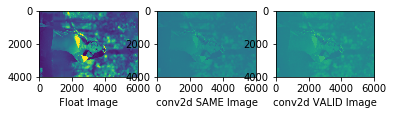

In [69]:
#zg.try.
import tensorflow as tf

imcy=misc.imread("/Users/zhanggan/mydata/tensorflow/resources/data/chenyan.jpg").astype(np.float)

print imcy.shape


# #Plot the images
%matplotlib inline
grayimcy=np.dot(imcy[...,:3], [0.299, 0.587, 0.114])
plt.subplot(1, 3, 1)   #形成一个1行3列的图形列表，现在绘制第一个
#plt.imshow(grayimcy)
plt.imshow(grayimcy)
plt.xlabel(" Float Image ")
g1 = np.expand_dims(grayimcy,0)
Imagecy = np.expand_dims(g1,-1)

xcy = tf.placeholder(tf.float32,shape=[None,4000,6000,1])
Wcy = tf.Variable(tf.truncated_normal([5,5,1,1],stddev=0.05))
convcy = tf.nn.conv2d(xcy,Wcy,strides=[1,1,1,1],padding="SAME")
convcy2= tf.nn.conv2d(xcy,Wcy,strides=[1,1,1,1],padding="VALID")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    rcy = sess.run(convcy,feed_dict={xcy:Imagecy})
    rcy2 = sess.run(convcy2,feed_dict={xcy:Imagecy})
g2 = np.reshape(rcy,(1,-1))
g3 = np.reshape(g2,(4000,6000))
plt.subplot(1, 3, 2)
plt.imshow(g3)
plt.xlabel(" conv2d SAME Image ")
g4 = np.reshape(rcy2,(1,-1))
g5 = np.reshape(g4,(4000-4,6000-4))
plt.subplot(1, 3, 3)
plt.imshow(g5)
plt.xlabel(" conv2d VALID Image ")

(512, 512, 3)
(512, 512)


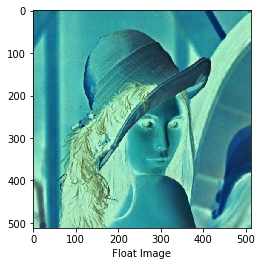

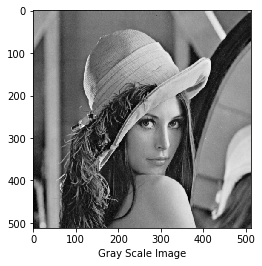

In [6]:
#read the image as Float data type
im=misc.imread("/Users/zhanggan/mydata/tensorflow/resources/data/lena.png").astype(np.float)
print im.shape
#im=misc.imread("one.png").astype(np.float)

#Convert image to gray scale
grayim=np.dot(im[...,:3], [0.299, 0.587, 0.114])

print grayim.shape
#Plot the images
%matplotlib inline

#plt.subplot(1, 2, 1)
plt.imshow(im)
plt.xlabel(" Float Image ")
plt.show()
plt.close()

#plt.subplot(1, 2, 2)
plt.imshow(grayim, cmap=plt.get_cmap("gray"))
plt.xlabel(" Gray Scale Image ")
plt.show()
plt.close()


#### Run this cell to experiemnt with MNIST image of Number 1. Gray Scale SIze (28, 28)

Print the shape of Gray Scale Image

In [5]:
# Your Code Goes Here
print grayim.shape


(512, 512)


<div align="right">
<a href="#printgray" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="printgray" class="collapse">
```
print grayim.shape

```
</div>

### Extend the Dimensions of the Gray Scale Image

For convolution, TensorFlow accepts Images of dimensions:

[num of images, width, height, channels].

In this case we are looking for dimensions of [1,512,512,1] from (512,512).

In [12]:
zim = np.expand_dims(grayim, 0)
zimage = np.expand_dims(zim, -1)
print zim.shape
print zimage.shape

(1, 512, 512)
(1, 512, 512, 1)


### Create Place holder for an input image and Print the Shape

The placeholder takes input in float format and same size of input image

In [8]:
# Your Code Goes Here
x = tf.placeholder(tf.float32,shape=[None,512,512,1])
print x.shape
print x.get_shape().as_list()

(?, 512, 512, 1)
[None, 512, 512, 1]


<div align="right">
<a href="#placeholder" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="placeholder" class="collapse">
```
img= tf.placeholder(tf.float32, [None,512,512,1])
print img.get_shape().as_list()

```
</div>

### Create a Variable for Weight Matrix and Print the Shape

The shape of weight matrix is of the form:
[ Height, widht, Input , Output]. 

In this case lets create weight matrix of size 5 X 5 and keeping number of inputs and output to just 1. So, the shape is of form [5,5,1,1].

In [9]:
# Your Code Goes Here
#W = tf.Variable(tf.zeros([5,5,1,1],tf.float32))
W = tf.Variable(tf.truncated_normal([5,5,1,1],stddev=0.05))
print W.shape.as_list()

[5, 5, 1, 1]


<div align="right">
<a href="#Variable" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Variable" class="collapse">
```
shape=[5,5,1,1]
weights =tf.Variable(tf.truncated_normal(shape, stddev=0.05))
print weights.get_shape().as_list()

```
</div>

###  Create Two Convolution Graphs in Tensorflow

lets use the functon tf.nn.conv2d to create a graph for convolution operation with padding 'same' and Padding 'Valid'.

In [10]:
# You Code Goes Here

# for convolution output 1
ConOut= tf.nn.conv2d(x,W,strides=[1,1,1,1],padding="SAME")

# for convolution output 2
ConOut2= tf.nn.conv2d(x,W,strides=[1,1,1,1],padding="VALID")


print ConOut.shape
print ConOut2.shape

(?, 512, 512, 1)
(?, 508, 508, 1)


<div align="right">
<a href="#Graph" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Graph" class="collapse">
```
ConOut = tf.nn.conv2d(input=img,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

ConOut2 = tf.nn.conv2d(input=img,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='VALID')
```
</div>

### Initialize all variables and Run the Sessions

In [11]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

Run the sesions to get the results for two convolution operations 

In [13]:
# Your Code Goes Here

# Session for Result 1
result = sess.run(ConOut,feed_dict={x:zimage})


# Session for Result 2
result2 = sess.run(ConOut2,feed_dict={x:zimage})
print result.shape
#print result
print result2.shape
#print result2

(1, 512, 512, 1)
(1, 508, 508, 1)


<div align="right">
<a href="#Result" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Result" class="collapse">
```
result = sess.run(ConOut,feed_dict={img:Image})

result2 = sess.run(ConOut2,feed_dict={img:Image})
```
</div>

###  Display the output images 

The result of convolution with 'same' padding is of the form [1,512,512,1] and for 'valid' padding image is of the shape [1,508,508,1]. To display the images, our job is to reshape the dimensions in the form (512,512) and (508,508) respectively.

In [14]:

# for the result with 'SAME' Padding 

#reduce the dimension
vec = np.reshape(result, (1, -1));   #展成一个（1，1*512*512*1）的一个tensor。
print vec.shape
#print vec
# Reshape the image
image= np.reshape(vec,(512,512))

print image.shape
#print image

# for the result with 'VALID' Padding 

#reduce the dimension
vec2 = np.reshape(result2, (1, -1));
# Reshape the image
image2= np.reshape(vec2,(508,508))

print image2.shape




(1, 262144)
(512, 512)
(508, 508)


Display the images 

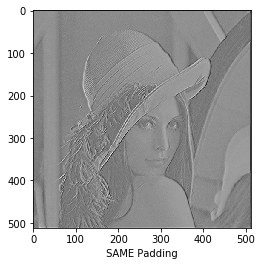

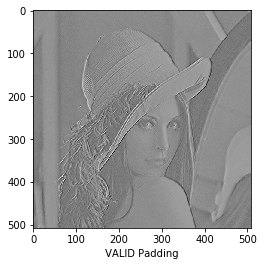

In [16]:
#Plot the images
%matplotlib inline

#plt.subplot(1, 2, 1)
plt.imshow(image,cmap=plt.get_cmap("gray"))
plt.xlabel(" SAME Padding ")
plt.show()
plt.close()

#plt.subplot(1, 2, 2)
plt.imshow(image2, cmap=plt.get_cmap("gray"))
plt.xlabel(" VALID Padding ")
plt.show()
plt.close()

Feel free to change the weight matrix and experiment with different Paddings to see the changes in output images. 

## Create First Convolution Neural Network Layer


using above conv2d function lets build our first conv Layer. Usually most general CNN architecture Layer 1 comprises of Convolution, Relu and MaxPooling. Lets create these functions to check the effects on "Lena" Image. Depending on the architecture these functions may change. For this exercise lets assume our Layer 1 has just three functions Convolution, Relu and Maxpooling.

It is most often repetation of these layers stacked on top of each other to create Deep CNN


In [17]:
#lets create functions for convolution and Maxpooling

def conv2d (X,W):
    
    #Your Code Goes Here
    return tf.nn.conv2d(input=X,filter=W,strides=[1,1,1,1],padding="SAME")
 

def MaxPool (X):
    
    #Your Code Goes Here
    return tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")


<div align="right">
<a href="#Function" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Function" class="collapse">
```
return tf.nn.conv2d(input=X,filter=W,strides=[1, 1, 1, 1],padding='SAME')

return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
```
</div>

### Create Weights and Biases for Convolution

The weights are of the shape [Height, Width , Input , Output]. Here lets create the weights of size 5X5 which has 1 input and 32 Outputs. 

In [30]:
channels = 2
weights = {
        # 5 x 5 convolution, 1 input image, 32 outputs
       
'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, channels]))        
       
    }
#weights = tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.05))
#biases = tf.Variable(tf.truncated_normal([5,5],stddev=0.05))
biases = {
        #bias should be of the size of number of Outputs
 'b_conv1': tf.Variable(tf.random_normal([channels]))      
        
    }
print weights

{'W_conv1': <tf.Variable 'Variable_5:0' shape=(5, 5, 1, 2) dtype=float32_ref>}


<div align="right">
<a href="#Weights" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Weights" class="collapse">
```
 'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 32]))

 'b_conv1': tf.Variable(tf.random_normal([32]))
```
</div>

### Define a TensorFlow Graph for Relu, Convolution and Maxpooling

The output of Conv2d is passed through Relu Layer and finally, the output of Relu is given as input for Maxpooling layer. Let's define the graph and print the shapes.The size of Image is reduced after passing through Maxpool Layer. You can change the size and strides in Maxpool layer to check how the image size varies 


In [31]:

conv1 =tf.nn.relu(conv2d(x,weights['W_conv1'])+biases['b_conv1']) # Your Code Goes here

Mxpool = MaxPool(conv1) # Your Code Goes here

    
print conv1.get_shape().as_list()

print Mxpool.get_shape().as_list()

[None, 512, 512, 2]
[None, 256, 256, 2]


<div align="right">
<a href="#Conv" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Conv" class="collapse">
```
tf.nn.relu(conv2d(img, weights['W_conv1']) + biases['b_conv1'])

MaxPool (conv1)
```
</div>

### Initialize all TensorFlow Variables and Run the Session

In [32]:

init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

### Run session to get the output of Layer 1 

The session is run on MxPool which will be the final output 

In [33]:
Layer1 = sess.run(Mxpool,feed_dict={x:zimage}) # Your Code Goes Here

<div align="right">
<a href="#Result123" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Result123" class="collapse">
```
sess.run(Mxpool,feed_dict={img:Image})


```
</div>

### Visualize the Output of Convolution layer1 

(1, 256, 256, 2)
(256, 256, 2)
(256, 256)
[[  109.16352844   267.82144165   260.57739258 ...,   258.93685913
    297.92913818   404.14505005]
 [  639.02349854   806.42462158   789.10064697 ...,   935.48156738
    988.98553467   973.99676514]
 [  654.82446289   803.21716309   791.4239502  ...,   976.07550049
   1005.18127441   900.62200928]
 ..., 
 [  223.82798767   266.26535034   265.95321655 ...,   394.82015991
    427.7321167    491.35336304]
 [  199.48750305   237.67694092   255.47576904 ...,   436.3644104
    464.6885376    530.44439697]
 [  403.22921753   495.6802063    484.69772339 ...,   893.55541992
    926.21307373   911.33843994]]


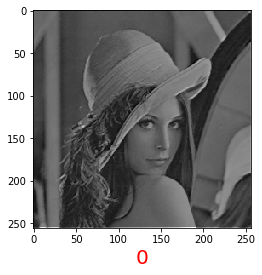

(256, 256)
[[ 202.42866516    0.            0.         ...,    0.            0.
    22.61379242]
 [ 350.15182495    0.            0.         ...,    0.            0.            0.        ]
 [ 354.78808594    0.            0.         ...,    0.            0.            0.        ]
 ..., 
 [ 129.09458923    0.            0.         ...,    0.            0.            0.        ]
 [ 109.16029358    0.            0.         ...,    0.            0.            0.        ]
 [ 172.38206482   82.83891296   63.14273834 ...,  131.46018982
   111.89641571    5.08831692]]


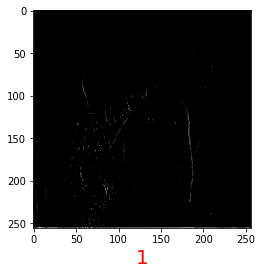

In [34]:
print Layer1.shape

vec = np.reshape(Layer1, (256,256,channels));
print vec.shape

for i in range (channels):
    
    image=vec[:,:,i]
    print image.shape
    #image *= 255.0/image.max() 
    print image
    
    plt.imshow(image,cmap=plt.get_cmap("gray"))
    plt.xlabel( i , fontsize=20, color='red')
    plt.show()
    plt.close()


Please feel free to experiemnt with different values of: Padding, Kernel Size to see how the output varies

The Idea behind this exercise is to gain understanding on how to apply convolutions and other functions on Images. We are NOT training Neural Network here, however just checking the effects of changing parameters of the above functions which are basic building blocks of any Deep Convolution neural Networks.  

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0120EN_DSX)This is the end of this lesson. Hopefully, now you have a deeper and intuitive understanding regarding the LSTM model. Thank you for reading this notebook, and good luck on your studies.

## Thank You Completing This Exercise 

Created by <a href = "https://ca.linkedin.com/in/shashibushan-yenkanchi"> Shashibushan Yenkanchi </a> </h4>
<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).